In [1]:
'''
import sys
sys.path.append("/Users/etmu9498/research/code/scripts/plotting")
'''

import os
import pandas as pd
import xarray as xr

os.chdir( "/Users/etmu9498/research/code/scripts/plotting")
import plot_all_in_situ_one_day as plotter
os.chdir( "/Users/etmu9498/research/code/scripts/in-situ-scripts")
import save_in_situ_as_netcdf as save

os.chdir( "/Users/etmu9498/research/code/scripts")
import make_plots

In [2]:
# run the save function once to create netcdf version of the .txt flight level data!
# save.save_as_netcdf()


TC Fred
Number of crl files: 7

Plot 1 saved

skipping case 1
skipping case 2
Plot 4 saved

skipping case 4
Plot 6 saved

skipping case 6


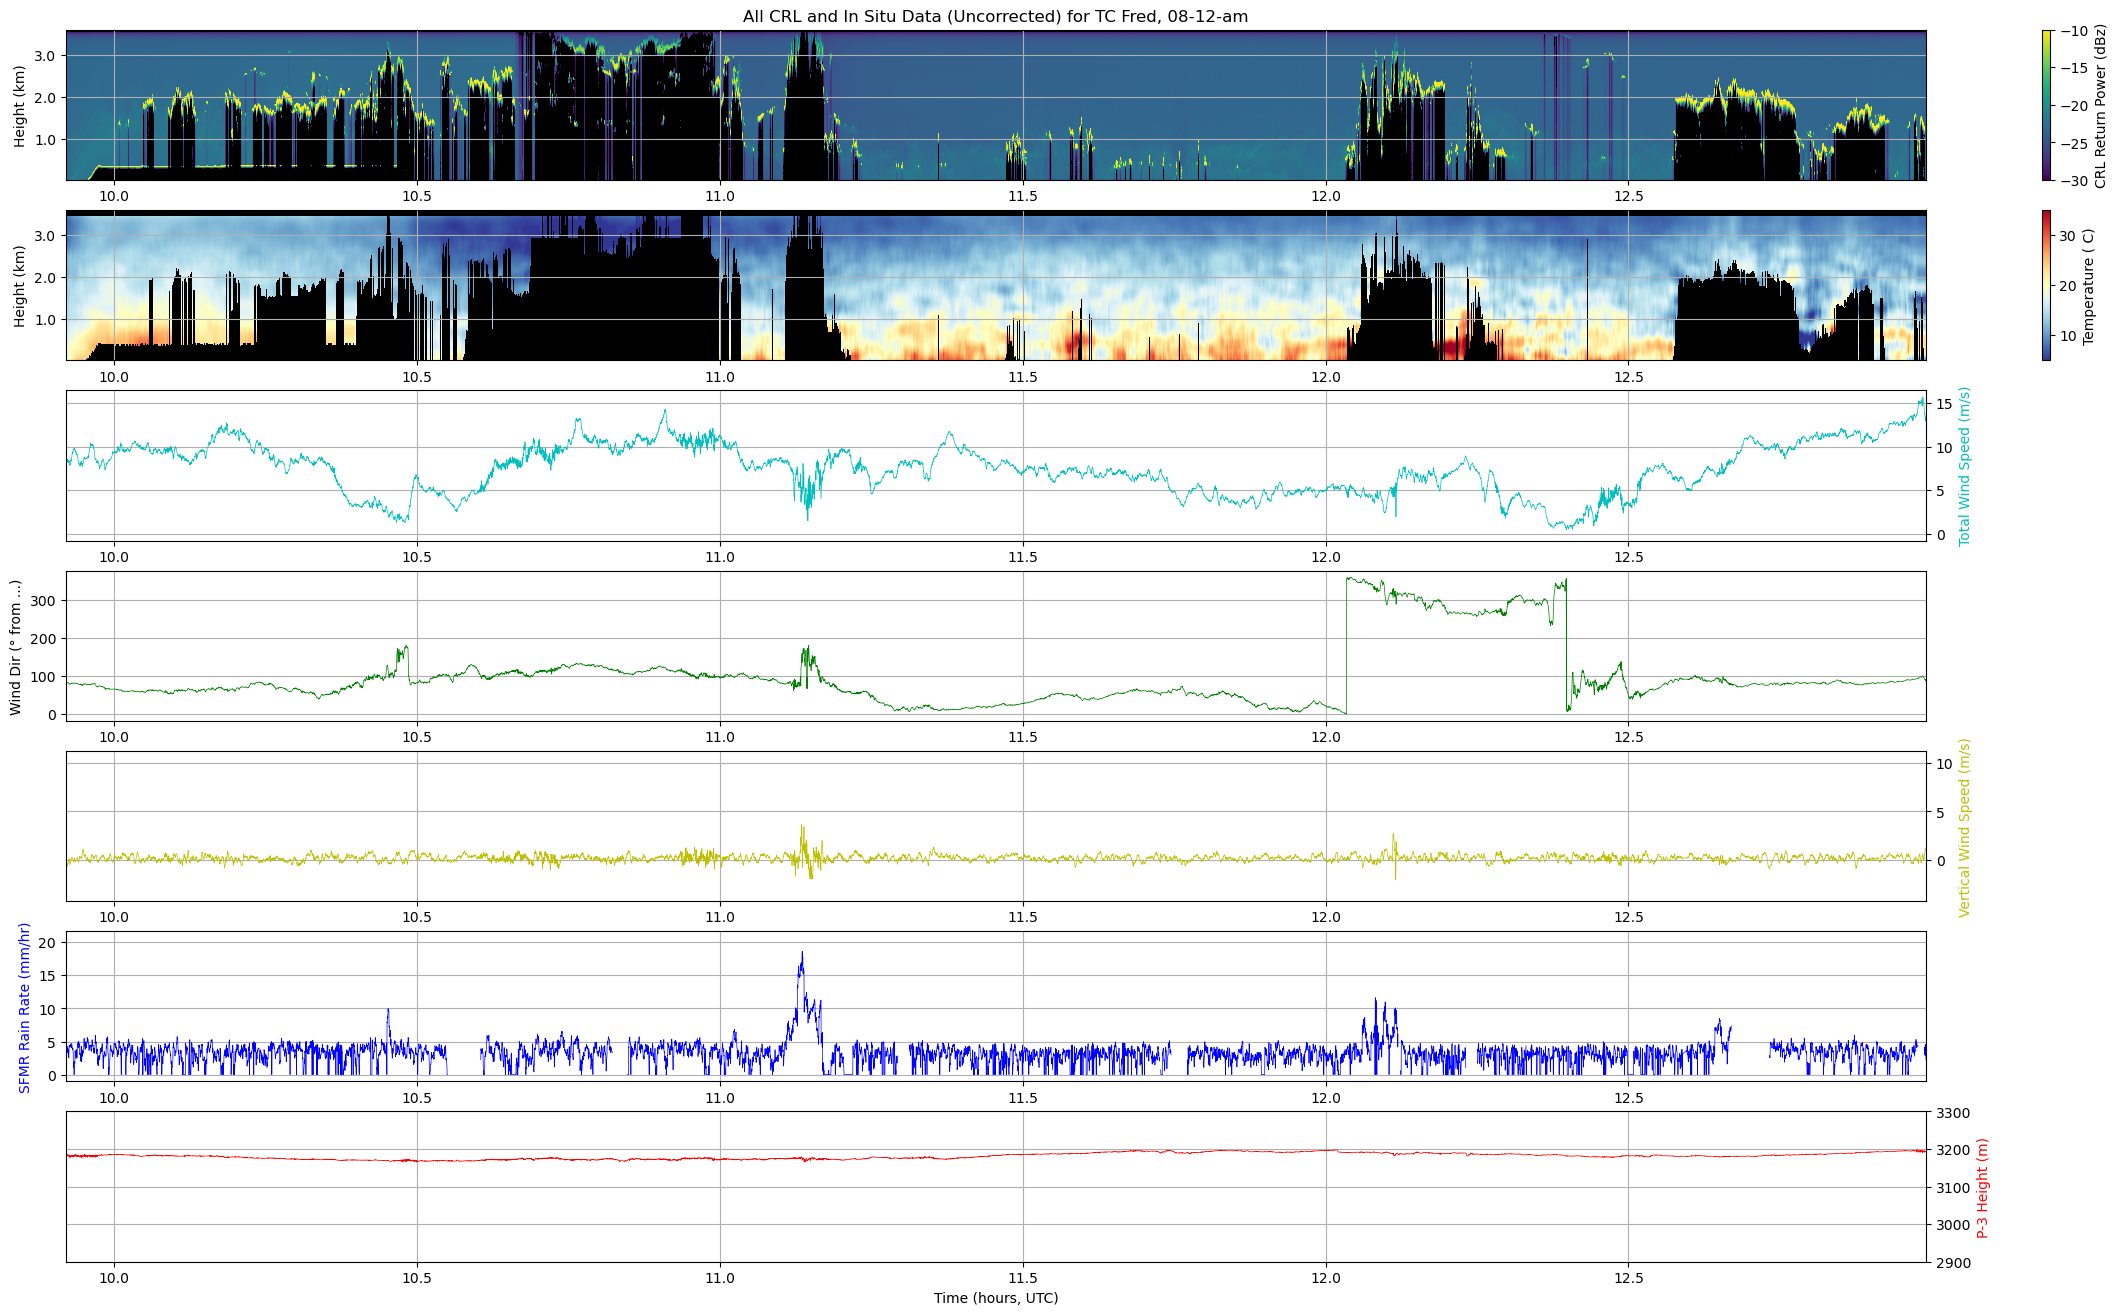

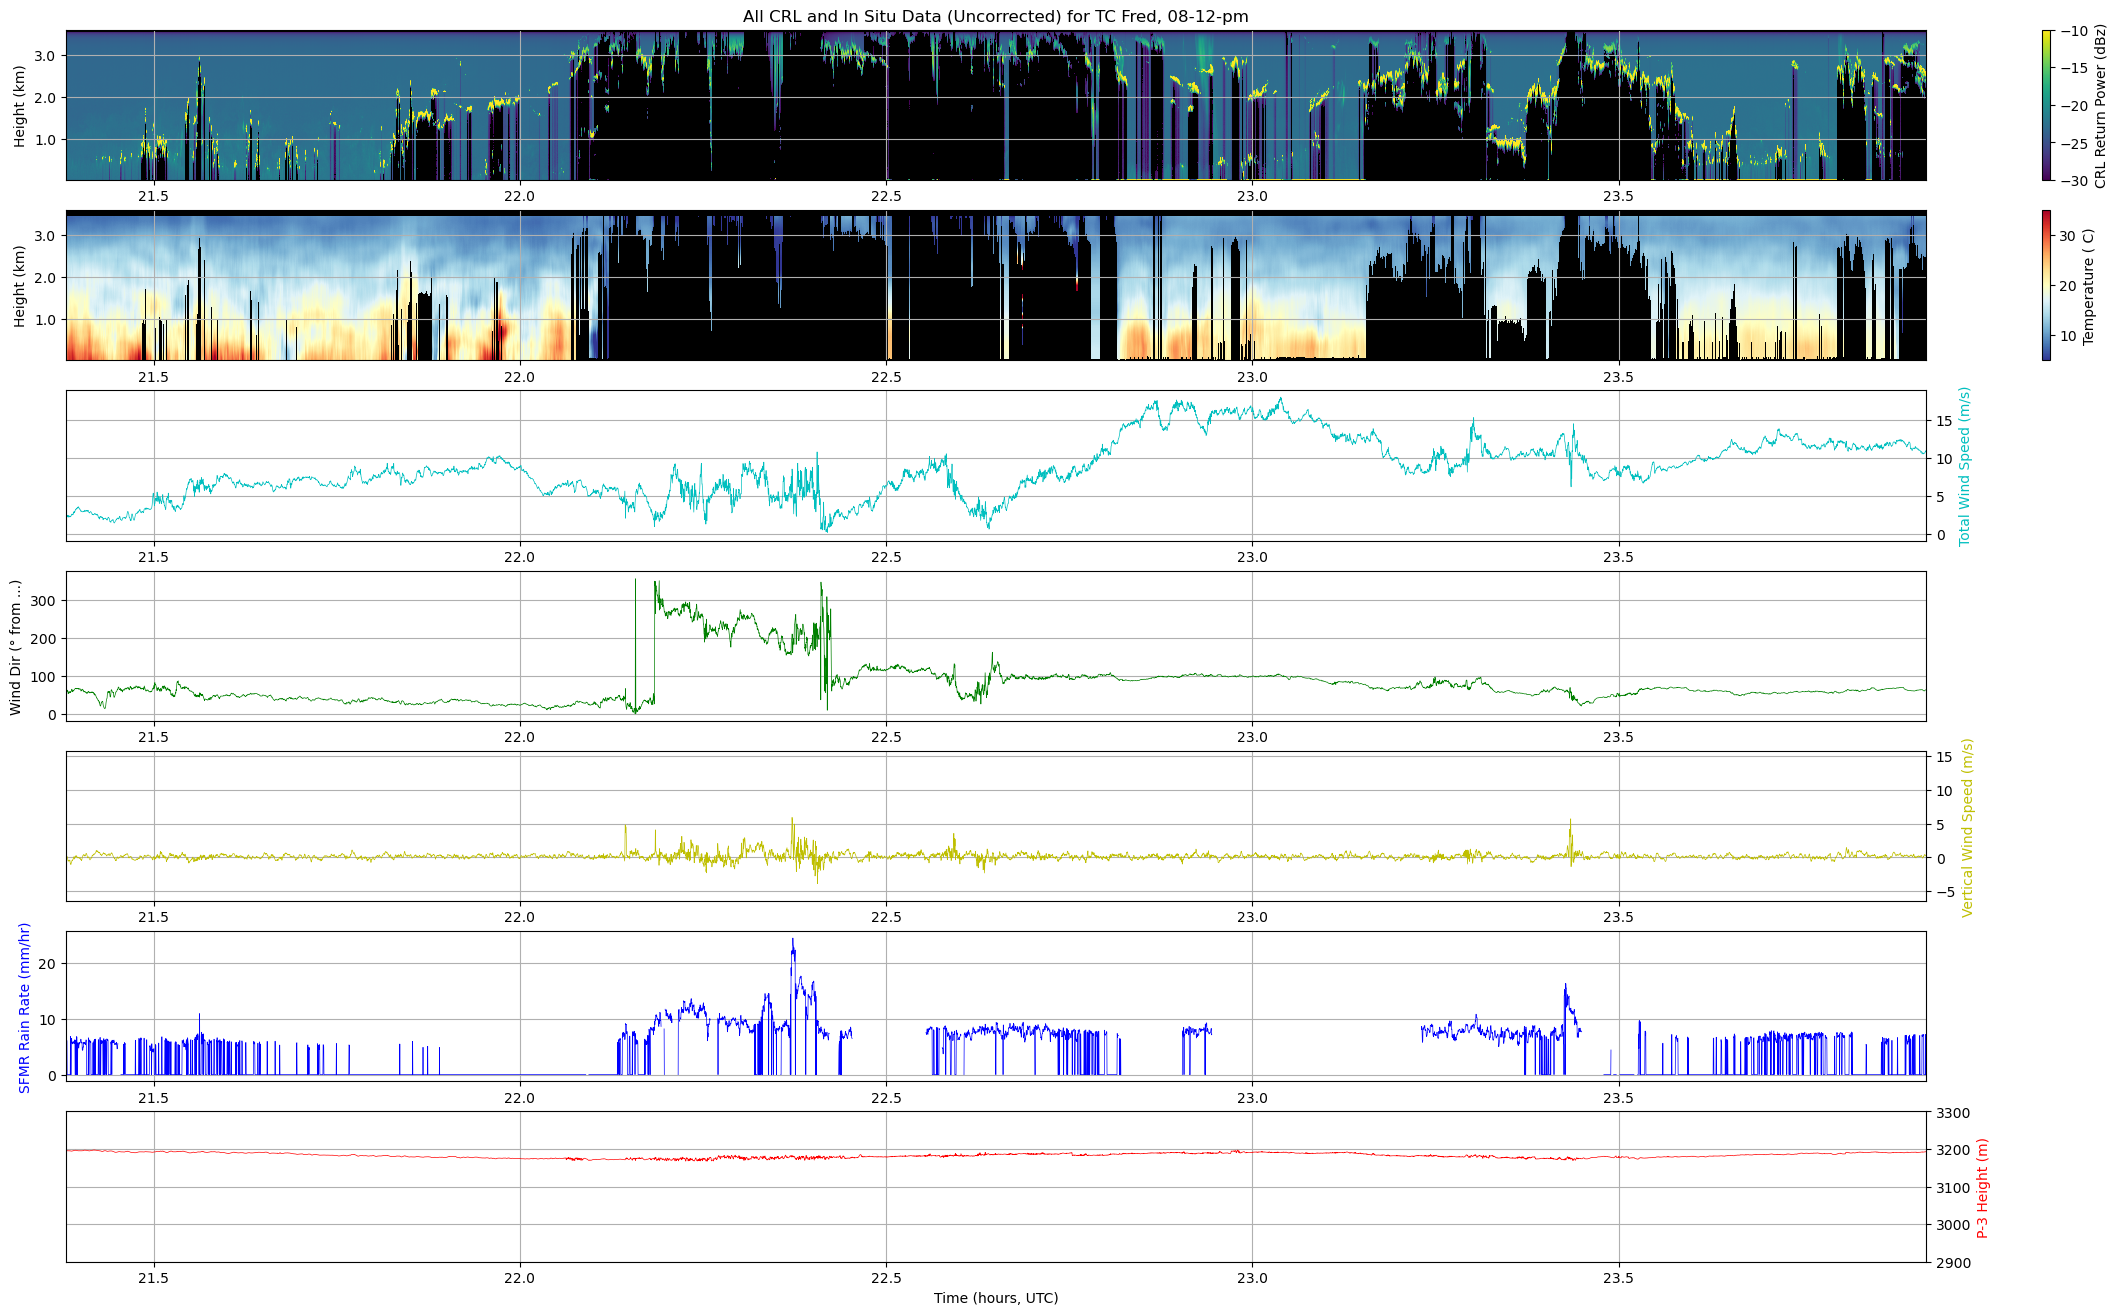

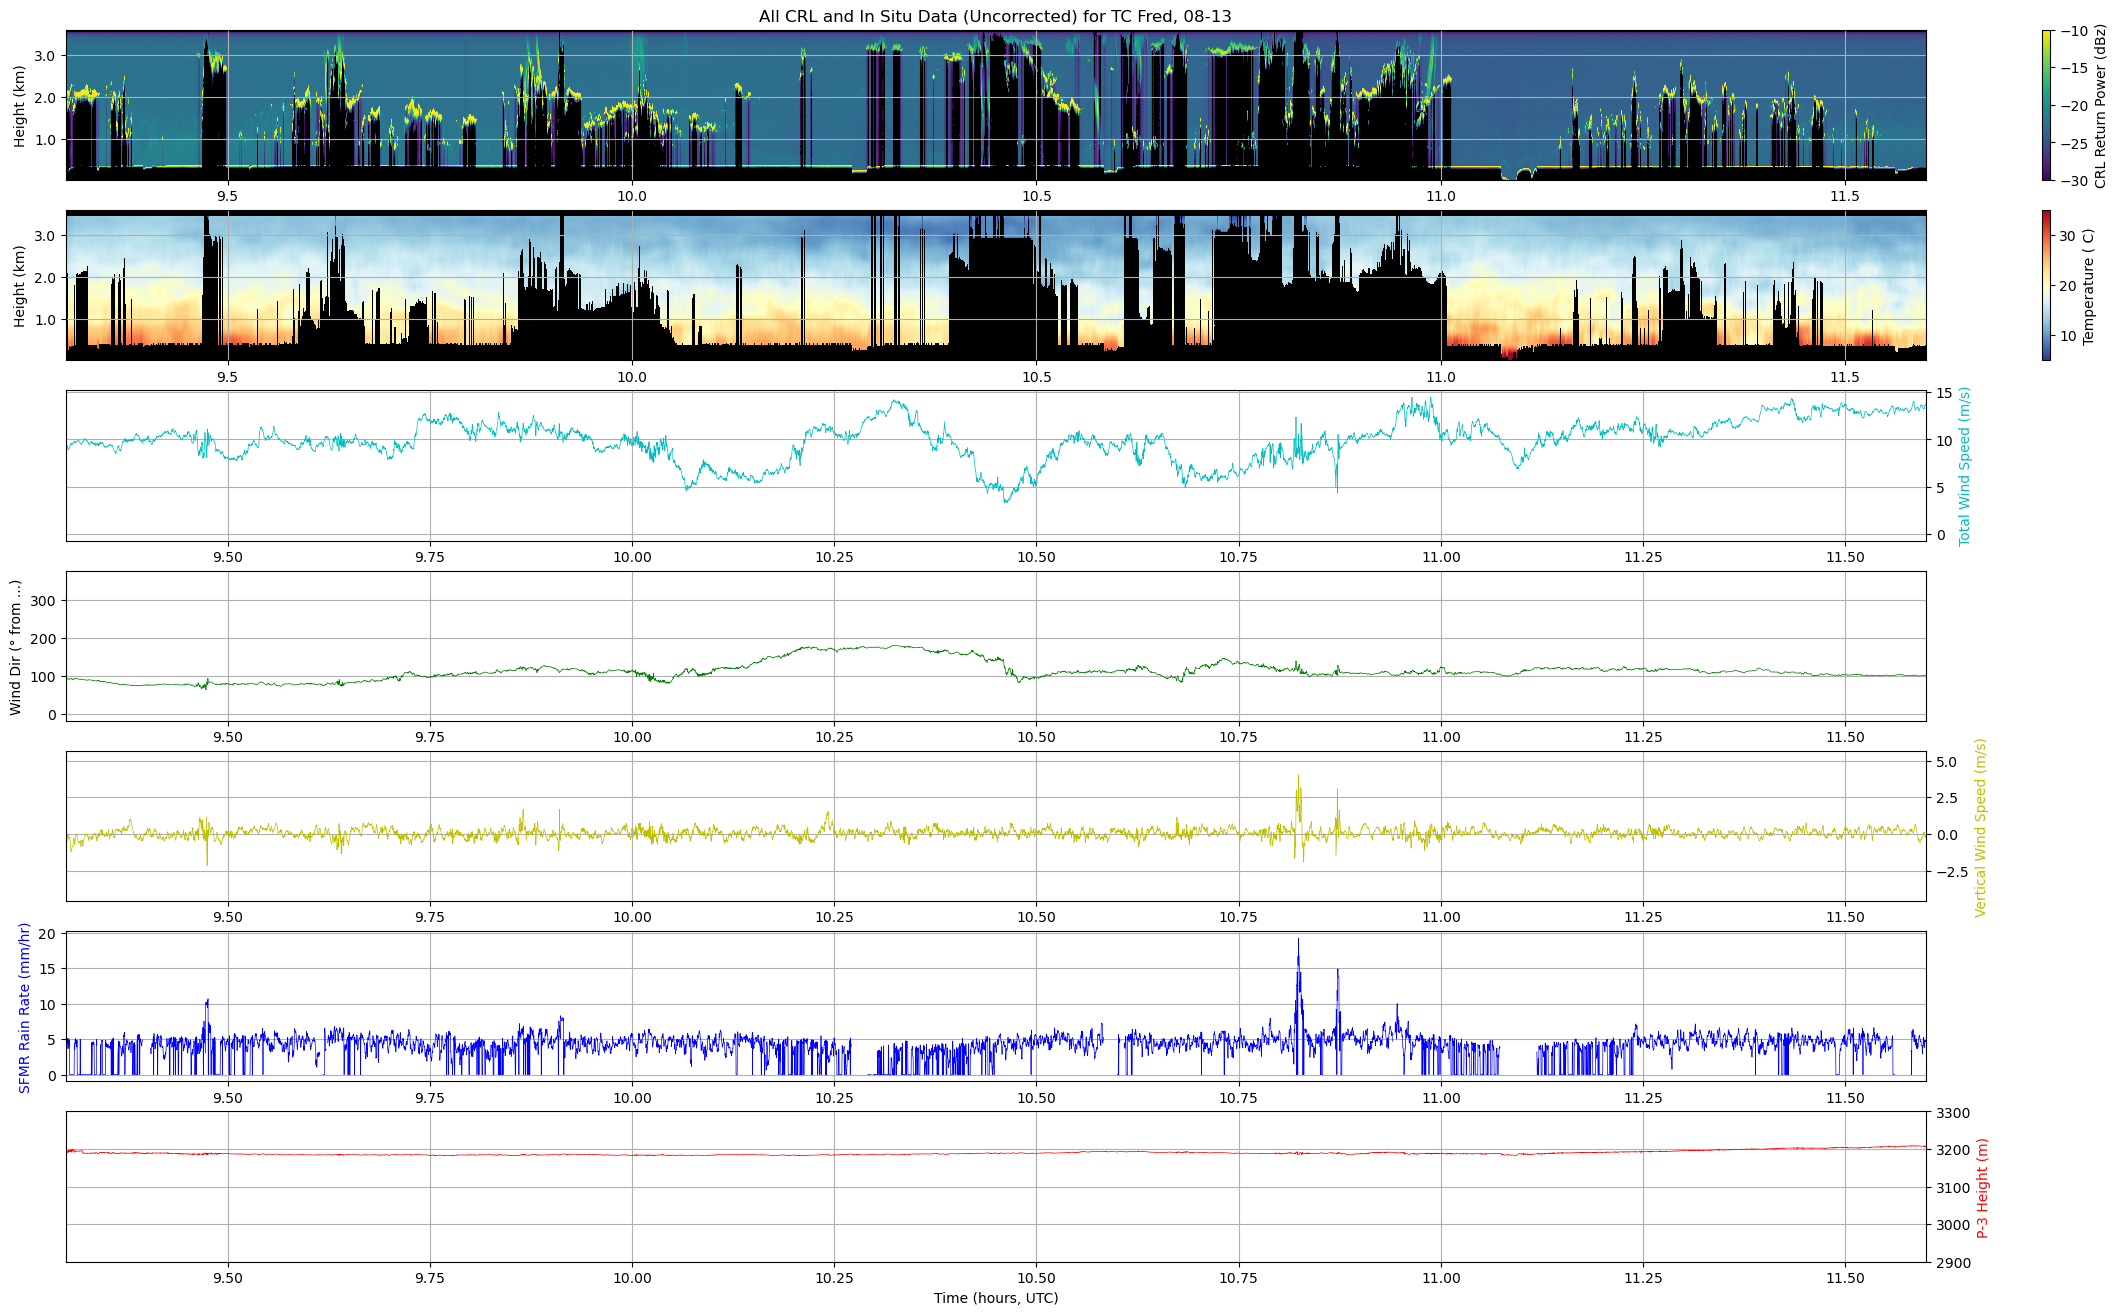

In [4]:
# plot crl and in situ data!
plotter.plot( tc='fred')

In [8]:
# testing part 1: see what xr and pd datasets look like
# setup for pandas
txt_path = "/Users/etmu9498/research/data/in-situ"
os.chdir( txt_path)
txt_list = make_plots.load_flight_level( txt_path, print_files=False)

# do this for every in situ data file
in_situ_data = pd.read_csv( txt_list[ 4], header=None, on_bad_lines='skip')


# load this again but as one of the new xarray files!
nc_path = "/Users/etmu9498/research/data/in-situ-new"
os.chdir( nc_path)
new_data = xr.open_dataset('in-situ-grace-08-17-eye-1.nc')

in_situ_data

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0,IWG1,20210812T062057,NaN,NaN,46.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IWG1,20210812T062058,NaN,NaN,46.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IWG1,20210812T062059,NaN,NaN,46.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IWG1_NAMES,TIME,LATref,LONref,ALTref,GPS_GeoidHt.3,ALTPAft.d,AltRaft.1,GS.d,TAS.d,...,THdgI-GPS.4,THETA.d,THETAE.d,THETAV.d,TRadD.1,TRadS.1,TRKdesired.d,TTM.1,TTM.2,TVIRT.d
4,IWG1,20210812T062100,NaN,NaN,46.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31346,IWG1,20210812T144730,27.9892,-82.0391,84.0,NaN,112.2,129.7,62.4,67.9,...,91.13,300.93,355.02,271.34,24.26,20.90,181.77,30.79,30.60,305.01
31347,IWG1,20210812T144731,27.9892,-82.0385,80.3,NaN,92.4,113.1,62.4,67.3,...,91.53,300.90,354.85,271.29,24.47,20.72,174.49,30.78,30.71,305.03
31348,IWG1,20210812T144732,27.9892,-82.0379,76.9,NaN,86.8,103.8,62.4,66.4,...,91.10,301.14,355.08,271.27,24.41,20.76,177.31,30.98,30.71,305.28
31349,IWG1,20210812T144733,27.9892,-82.0372,73.7,NaN,81.9,93.6,62.4,67.4,...,90.89,301.06,355.03,271.26,23.98,20.77,180.27,30.98,30.77,305.22


In [2]:
# testing part 2: are datasets being trimmed?
# this all works! I just had a small typo where I converted the nontrimmed pd to xr, instead of the trimmed version

txt_path = "/Users/etmu9498/research/data/in-situ"
os.chdir( txt_path)
txt_list = make_plots.load_flight_level( txt_path, print_files=False)

in_situ_data = pd.read_csv( txt_list[ 0], header=None)

print( txt_list[0][0:-3])

# make proper row the df header (some rows have text descriptors, for some reason this varies
# between data sets)
for col_ind in range( len( in_situ_data.columns)):
    # print( col_ind)
    if in_situ_data.iloc[ col_ind][1] == 'TIME':
        in_situ_data.columns = in_situ_data.iloc[ col_ind]
        break

# removing 1203 rows that just repeat the header keys, and 6 rows with empty lat lon
in_situ_data = in_situ_data[ in_situ_data['TIME'] != 'TIME']
in_situ_data = in_situ_data[ ~ pd.isna( in_situ_data['LATref']) ]
# removing 4 columns that are labeled as 'none'
in_situ_data.drop( 'none', inplace=True, axis=1)

# new step!
# cut pandas dataframe down to only the values that are of interest
# this will hopefully save some time when saving and transitioning to xr?
# keylist was taken from simple_flight_level_plot.plot()... shoud be all I need!
keylist = [ 'TIME', 'WS.d', 'WD.d', 'UWZ.d', 'ASfmrRainRate.1', 'LATref', 'LONref', 'TAS.d', 'HT.d']
in_situ_data_trim = in_situ_data[ keylist]

# adding datetime and just time formatted columns to pandas dataframe
in_situ_data_trim['dt'] = pd.to_datetime( in_situ_data_trim['TIME'])
in_situ_data_trim['time'] = [dt_object.time() for dt_object in in_situ_data_trim.dt ]

# convert from pandas to xarray
xr_in_situ =  pd.DataFrame.to_xarray( in_situ_data_trim)


# get data out of xarray and put it in a useable format
time = xr_in_situ.time.values
# also store the data in string and decimal formats for easier plotting
str_time = [ ti.strftime('%H:%M:%S') for ti in time ]
float_time = []
for val in time:
    # account for wraparound times into next day
    if val.hour + val.minute / 60 + val.second / 3600 < 6.0:
        float_time.append( 24.0 + val.hour + val.minute / 60 + val.second / 3600)
    else:
        float_time.append( val.hour + val.minute / 60 + val.second / 3600)

xr_in_situ

20210527H1_iwg1.


C:\Users\etmu9498\AppData\Local\Temp\ipykernel_46200\2938780613.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_situ_data_trim['dt'] = pd.to_datetime( in_situ_data_trim['TIME'])
C:\Users\etmu9498\AppData\Local\Temp\ipykernel_46200\2938780613.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_situ_data_trim['time'] = [dt_object.time() for dt_object in in_situ_data_trim.dt ]


<xarray.Dataset>
Dimensions:          (index: 16369)
Coordinates:
  * index            (index) int64 0 1 2 4 5 6 ... 16980 16981 16982 16983 16984
Data variables:
    TIME             (index) object '20210527T205257' ... '20210528T013027'
    WS.d             (index) object '1.34' '1.34' '1.34' ... '1.61' '1.62'
    WD.d             (index) object '353.5281' '2.9385' ... '348.2066'
    UWZ.d            (index) object '-0.53' '-0.46' '-0.42' ... '0.33' '0.13'
    ASfmrRainRate.1  (index) object nan nan nan nan nan ... nan nan nan nan nan
    LATref           (index) object '27.9808' '27.9808' ... '27.9903' '27.9903'
    LONref           (index) object '-82.0173' '-82.0173' ... '-82.0241'
    TAS.d            (index) object '1.3' '1.3' '1.3' ... '11.3' '10.5' '10.7'
    HT.d             (index) object '141.59' '141.50' ... '150.40' '150.41'
    dt               (index) datetime64[ns] 2021-05-27T20:52:57 ... 2021-05-2...
    time             (index) object 20:52:57 20:52:58 ... 01:30:26 01:30:27

In [3]:
# testing cell 3: how do the new nc files look??
nc_path = "/Users/etmu9498/research/data/in-situ-nc"
os.chdir( nc_path)
new_data = xr.open_dataset('20210527H1_iwg1.nc')

new_data

<xarray.Dataset>
Dimensions:          (index: 16369, time: 16369)
Coordinates:
  * index            (index) int64 0 1 2 4 5 6 ... 16980 16981 16982 16983 16984
  * time             (time) float64 20.88 20.88 20.88 ... 25.51 25.51 25.51
Data variables: (12/13)
    TIME             (index) object ...
    WS.d             (index) float64 ...
    WD.d             (index) float64 ...
    UWZ.d            (index) float64 ...
    ASfmrRainRate.1  (index) float64 ...
    LATref           (index) float64 ...
    ...               ...
    TAS.d            (index) float64 ...
    HT.d             (index) float64 ...
    PITCHref         (index) float64 ...
    ROLLref          (index) float64 ...
    dt               (index) datetime64[ns] ...
    str_time         (index) object ...